### Importação dos dados



In [97]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url); loja['loja'] = 'loja_1'
loja2 = pd.read_csv(url2); loja2['loja'] = 'loja_2'
loja3 = pd.read_csv(url3); loja3['loja'] = 'loja_3'
loja4 = pd.read_csv(url4); loja4['loja'] = 'loja_4'

df = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
df.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,loja
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja_1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja_1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja_1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,loja_1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja_1


#1. Análise do faturamento


In [98]:
faturamento_loja = round(sum(loja.Preço),2)
faturamento_loja2 = round(sum(loja2.Preço),2)
faturamento_loja3 = round(sum(loja3.Preço),2)
faturamento_loja4 = round(sum(loja4.Preço),2)

In [99]:
faturamento = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]
faturamento

[1534509.12, 1488459.06, 1464025.03, 1384497.58]

# 2. Vendas por Categoria


In [100]:
vendas_por_categoria = (
    df
    .groupby(['loja', 'Categoria do Produto'])
    .size()
    .reset_index(name='quantidade')
)

In [101]:
display(vendas_por_categoria)

,loja,Categoria do Produto,quantidade
0,loja_1,brinquedos,324
1,loja_1,eletrodomesticos,312
2,loja_1,eletronicos,448
3,loja_1,esporte e lazer,284
4,loja_1,instrumentos musicais,182
5,loja_1,livros,173
6,loja_1,moveis,465
7,loja_1,utilidades domesticas,171
8,loja_2,brinquedos,313
9,loja_2,eletrodomesticos,305


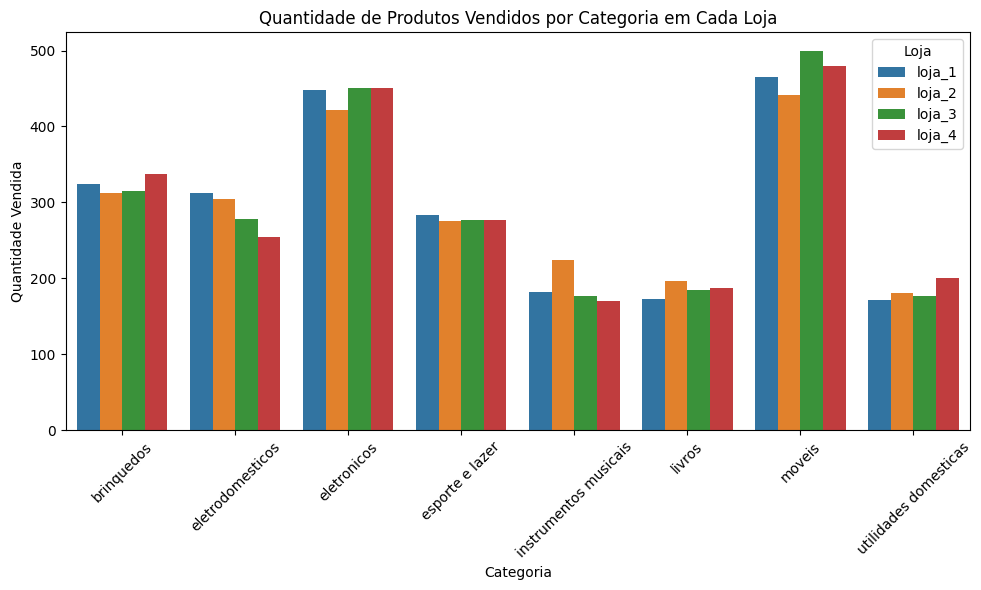

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(data=vendas_por_categoria, x='Categoria do Produto', y='quantidade', hue='loja')
plt.title('Quantidade de Produtos Vendidos por Categoria em Cada Loja')
plt.xlabel('Categoria')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.legend(title='Loja', loc='upper right')
plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [103]:
media_avaliacao_loja = df.groupby('loja')['Avaliação da compra'].mean().reset_index()

In [104]:
display(media_avaliacao_loja)

,loja,Avaliação da compra
0,loja_1,3.976685
1,loja_2,4.037304
2,loja_3,4.048326
3,loja_4,3.995759


/tmp/ipython-input-1041674709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=media_avaliacao_loja, x='loja', y='Avaliação da compra', palette='coolwarm')


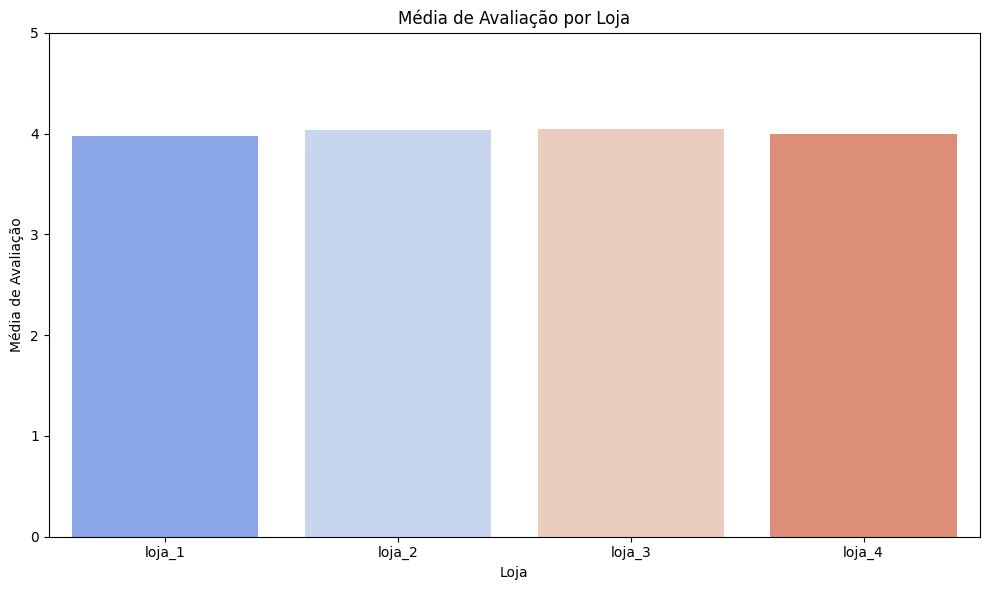

In [105]:
# Gráfico de barras - média de avaliação por loja
plt.figure(figsize=(10, 6))
sns.barplot(data=media_avaliacao_loja, x='loja', y='Avaliação da compra', palette='coolwarm')
plt.title('Média de Avaliação por Loja')
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')
plt.ylim(0, 5)  # A escala de avaliação é geralmente de 0 a 5
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [106]:
vendas_por_produto = df.groupby('Produto').size().reset_index(name='quantidade')

In [107]:
mais_vendidos = vendas_por_produto.sort_values(by='quantidade', ascending=False)
menos_vendidos = vendas_por_produto.sort_values(by='quantidade', ascending=True)

In [108]:
display(mais_vendidos.head())
display(menos_vendidos.head())

,Produto,quantidade
17,Cômoda,210
10,Carrinho controle remoto,206
37,Micro-ondas,206
1,Bateria,203
9,Cama king,201


,Produto,quantidade
11,Celular ABXY,157
26,Headset,158
38,Mochila,163
25,Guitarra,165
13,Ciência de dados com python,166


# 5. Frete Médio por Loja


In [109]:
frete_medio_loja = df.groupby('loja')['Frete'].mean().reset_index()

In [110]:
display(frete_medio_loja)

,loja,Frete
0,loja_1,34.691805
1,loja_2,33.621941
2,loja_3,33.074464
3,loja_4,31.278997


/tmp/ipython-input-3397485982.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=frete_medio_loja, x='loja', y='Frete', palette='magma')


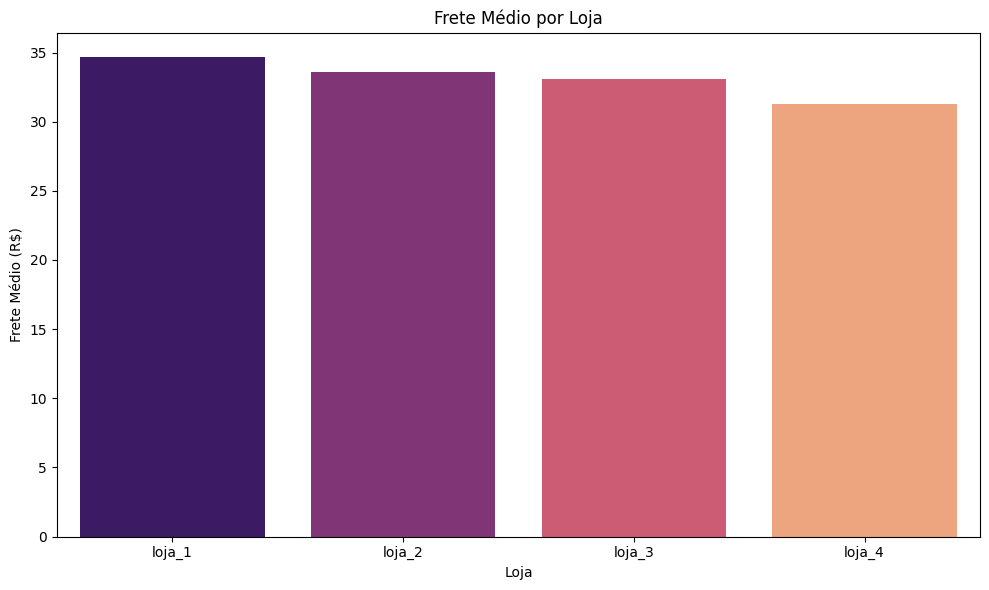

In [111]:

# Gráfico de barras - frete médio por loja
plt.figure(figsize=(10, 6))
sns.barplot(data=frete_medio_loja, x='loja', y='Frete', palette='magma')
plt.title('Frete Médio por Loja')
plt.xlabel('Loja')
plt.ylabel('Frete Médio (R$)')
plt.tight_layout()
plt.show()
